In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%config Completer.use_jedi=False

In [2]:
df=pd.read_csv("US_Accidents_Dec21_updated.csv")

In [3]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

In [4]:
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})


top_10_cities=pd.DataFrame(city_df.head(10))

# Data Exploration

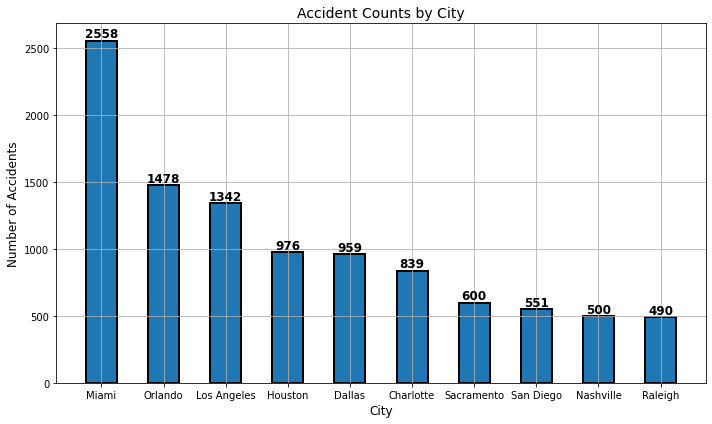

In [5]:
import matplotlib.pyplot as plt

cities = list(top_10_cities['City'])
accident_counts = list(top_10_cities['Cases'])

plt.figure(figsize=(10, 6))
plt.bar(cities, accident_counts, width=0.5, edgecolor='k', linewidth=2)

for index, row in top_10_cities.iterrows():
    plt.text(index, row['Cases'], row['Cases'], ha='center', va='bottom',
             fontsize=12, fontweight='bold')



plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.title('Accident Counts by City', fontsize=14)
plt.xticks(rotation=360)

plt.grid(True)
plt.tight_layout()
plt.show()

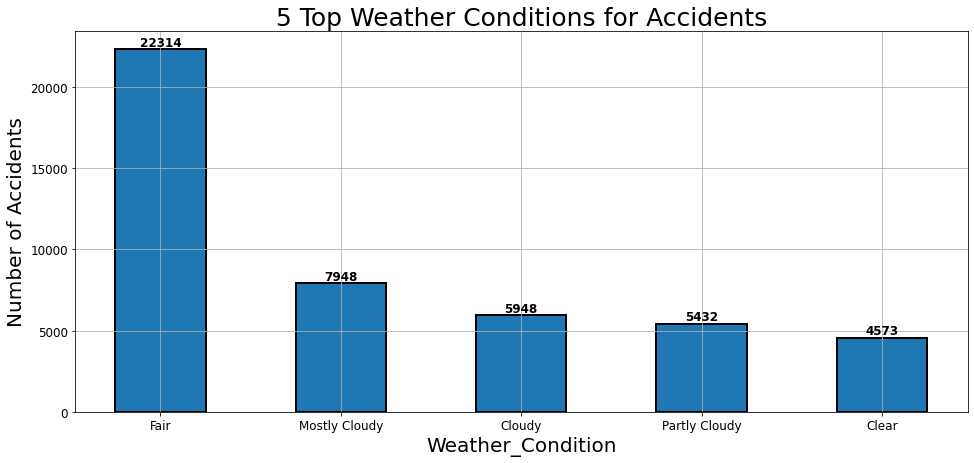

In [6]:
w_df = pd.DataFrame(df['Weather_Condition'].value_counts()).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})
w_df=w_df.head(5)



# Create the bar chart
fig, ax = plt.subplots(figsize=(16, 7))
plt.bar(list(w_df['Weather_Condition']),list(w_df['Cases']) , width=0.5, edgecolor='k', linewidth=2)

for index, row in w_df.iterrows():
    plt.text(index, row['Cases'], row['Cases'], ha='center', va='bottom',
             fontsize=12, fontweight='bold')


# Customize the chart
plt.xlabel('Weather_Condition', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)
plt.xticks(rotation=360)
ax.tick_params(labelsize=12)
plt.title('5 Top Weather Conditions for Accidents', fontsize=25)
plt.grid()

# Display the chart
plt.show()

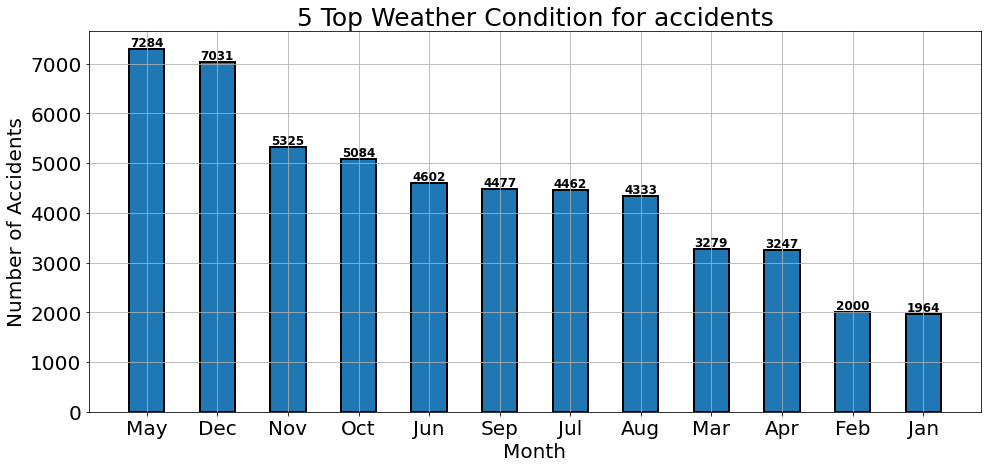

In [7]:
month_df=pd.DataFrame(df['Month'].value_counts()).reset_index().rename(columns={'index':'Month', 'Month':'Cases'})



fig, ax=plt.subplots(figsize=(16,7))
# month_df.plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)

# month_df['Month']

plt.bar(month_df['Month'], month_df['Cases'], width=0.5, edgecolor='k', linewidth=2)
for index, row in month_df.iterrows():
    plt.text(index, row['Cases'], row['Cases'], ha='center', va='bottom',
             fontsize=12, fontweight='bold')


plt.xlabel('Month',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
plt.xticks(rotation=360)

ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
# plt.ioff()

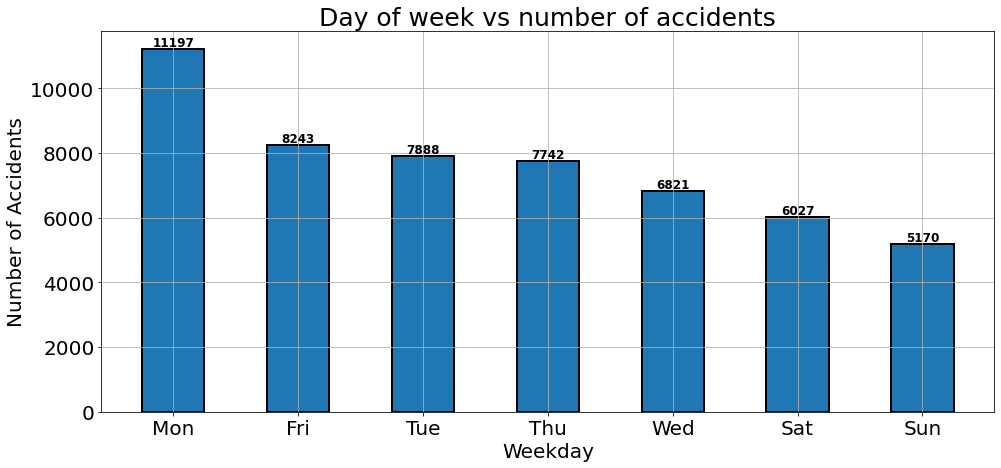

In [8]:
w_df=pd.DataFrame(df['Weekday'].value_counts()).reset_index().rename(columns={'index':'Weekday', 'Weekday':'Cases'})



fig, ax=plt.subplots(figsize=(16,7))
# month_df.plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)

# month_df['Month']

plt.bar(w_df['Weekday'], w_df['Cases'], width=0.5, edgecolor='k', linewidth=2)
for index, row in w_df.iterrows():
    plt.text(index, row['Cases'], row['Cases'], ha='center', va='bottom',
             fontsize=12, fontweight='bold')


plt.xlabel('Weekday',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
plt.xticks(rotation=360)

ax.tick_params(labelsize=20)
plt.title('Day of week vs number of accidents',fontsize=25)
plt.grid()
# plt.ioff()

In [27]:
train_y = df['Severity'].values
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64']
train_col= df[x_cols]

In [28]:
for column in ['Humidity(%)',
 'Number',
 'Precipitation(in)',
 'Pressure(in)',
 'Temperature(F)',
 'Visibility(mi)',
 'Wind_Chill(F)',
 'Wind_Speed(mph)']:
    if df[column].dtype == 'object':
        # For categorical columns, fill NA values with a separate category or mode
        df[column].fillna('Unknown', inplace=True)  # Fill NA values with 'Unknown'
    else:
        # For numerical columns, fill NA values with mean, median, or other strategies
        df[column].fillna(df[column].mean(), inplace=True)  # Fill NA values with mean/''

/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [30]:
df=df.dropna()

In [31]:
df.Severity.value_counts()

2    45141
3     2249
4     2201
Name: Severity, dtype: int64

# Model Training

In [16]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier

# Load the data from a CSV file
data = df.copy()

# Select the features and target variable
features=x_cols
target = 'Severity'

# Convert datetime features to numeric
data['Start_Time'] = pd.to_datetime(data['Start_Time']).astype(int)
data['End_Time'] = pd.to_datetime(data['End_Time']).astype(int)

# Replace missing values or preprocess the data as needed
    # Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Create a Random Forest classifier
clf = BalancedRandomForestClassifier(n_estimators=100,max_depth=7,random_state=105)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib

/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib

/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib

/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib

/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib

/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib

/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/kavin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/kavin/.pyenv/versions/3.8.5/lib

Accuracy: 0.7789091642302651


In [21]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
import numpy as np
def plot_cm(pred,gt,classes):
    cm = confusion_matrix(gt.tolist(), pred.tolist(), labels=classes)
    print(cm)
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                        show_absolute=True,
                        show_normed=True,
                        colorbar=True)
    acc = np.round(accuracy_score(gt.tolist(), pred.tolist())*100,4)
    record = len(pred)
    title = "  Accuracy: "+np.round(acc,2) +"Decisions: "+record
    plt.title(title)

In [23]:
import mlxtend
print(mlxtend.__version__)

0.21.0


Text(0.5, 1.0, ' Accuracy: 77.89 Decisions: 9919')

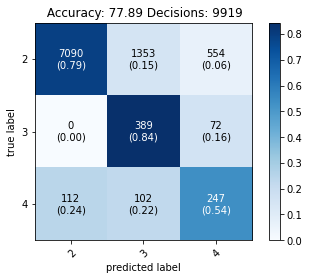

In [25]:
pred=y_pred
gt=y_test
classes=list(set(df.Severity))

cm = confusion_matrix(gt.tolist(), pred.tolist(), labels=classes)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                        show_absolute=True,
                        show_normed=True,
                        colorbar=True,class_names=classes
                               )
acc = accuracy_score(gt.tolist(), pred.tolist())*100
record = len(pred)
title = " Accuracy: "+str(np.round(acc,2) )+" "+"Decisions: "+str(record)
plt.title(title)